In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [155]:
apple = pd.read_csv("HistoricalQuotes.csv")
print(apple.head())

         Date  Close/Last     Volume      Open      High       Low
0  02/28/2020     $273.36  106721200   $257.26   $278.41   $256.37
1  02/27/2020     $273.52   80151380    $281.1      $286   $272.96
2  02/26/2020     $292.65   49678430   $286.53   $297.88    $286.5
3  02/25/2020     $288.08   57668360   $300.95   $302.53   $286.13
4  02/24/2020     $298.18   55548830   $297.26   $304.18   $289.23


In [156]:
print(apple.tail())

            Date  Close/Last     Volume       Open       High        Low
2513  03/05/2010    $31.2786  224647427   $30.7057   $31.3857   $30.6614
2514  03/04/2010    $30.1014   89591907   $29.8971   $30.1314   $29.8043
2515  03/03/2010    $29.9043   92846488   $29.8486   $29.9814   $29.7057
2516  03/02/2010    $29.8357  141486282     $29.99   $30.1186   $29.6771
2517  03/01/2010    $29.8557  137312041   $29.3928   $29.9286     $29.35


In [157]:
print("training days =",apple.shape)

training days = (2518, 6)


In [158]:
header_names = ['Date','Close','Volume','Open','High','Low']
apple = pd.read_csv("HistoricalQuotes.csv", header=None,skiprows=1, names = header_names)
print(apple.head())

         Date     Close     Volume      Open      High       Low
0  02/28/2020   $273.36  106721200   $257.26   $278.41   $256.37
1  02/27/2020   $273.52   80151380    $281.1      $286   $272.96
2  02/26/2020   $292.65   49678430   $286.53   $297.88    $286.5
3  02/25/2020   $288.08   57668360   $300.95   $302.53   $286.13
4  02/24/2020   $298.18   55548830   $297.26   $304.18   $289.23


In [159]:
apple = apple.replace('[^\d.]','',regex= True).astype(float)
apple

,Date,Close,Volume,Open,High,Low
0,2282020.0,273.3600,106721200.0,257.2600,278.4100,256.3700
1,2272020.0,273.5200,80151380.0,281.1000,286.0000,272.9600
2,2262020.0,292.6500,49678430.0,286.5300,297.8800,286.5000
3,2252020.0,288.0800,57668360.0,300.9500,302.5300,286.1300
4,2242020.0,298.1800,55548830.0,297.2600,304.1800,289.2300
...,...,...,...,...,...,...
2513,3052010.0,31.2786,224647427.0,30.7057,31.3857,30.6614
2514,3042010.0,30.1014,89591907.0,29.8971,30.1314,29.8043
2515,3032010.0,29.9043,92846488.0,29.8486,29.9814,29.7057
2516,3022010.0,29.8357,141486282.0,29.9900,30.1186,29.6771


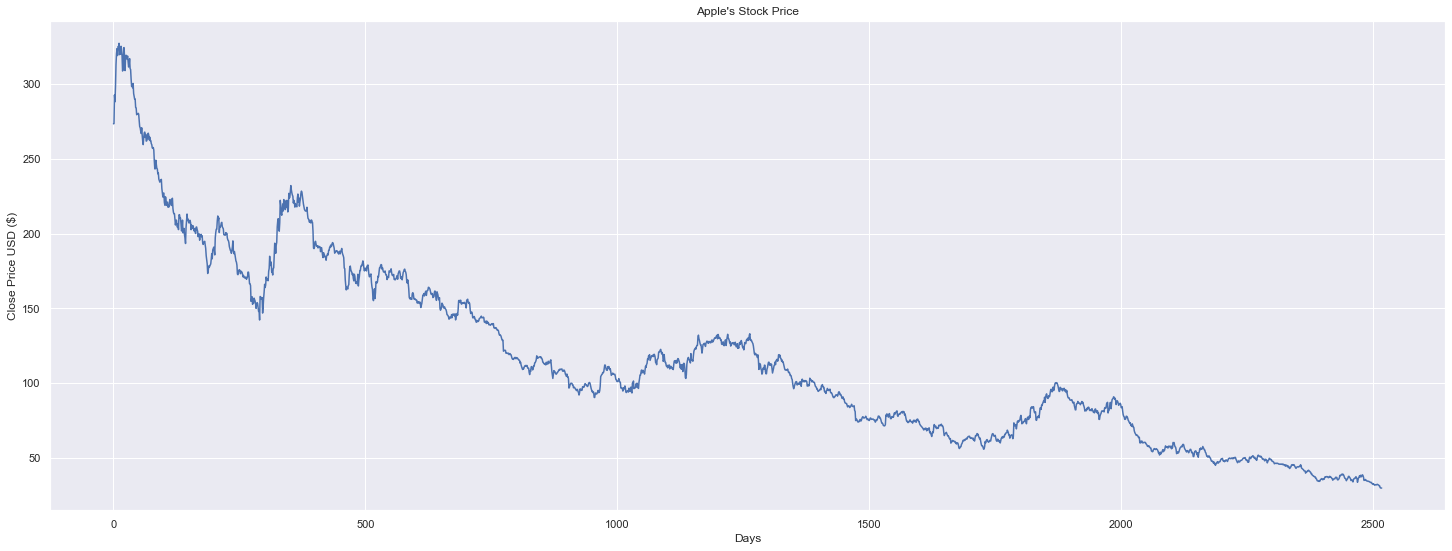

In [160]:
sns.set()
plt.figure(figsize=(25, 9))
plt.title("Apple's Stock Price")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(apple["Close"])
plt.show()

In [161]:
apple = apple[["Close"]]
apple

,Close
0,273.3600
1,273.5200
2,292.6500
3,288.0800
4,298.1800
...,...
2513,31.2786
2514,30.1014
2515,29.9043
2516,29.8357


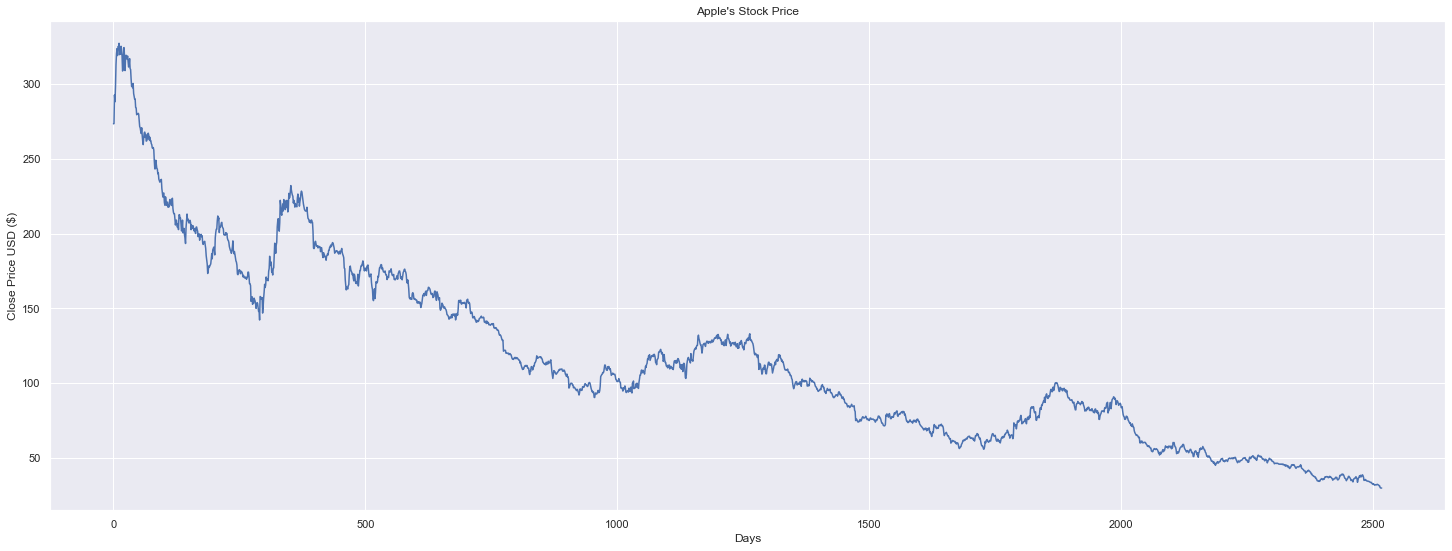

In [162]:
sns.set()
plt.figure(figsize=(25, 9))
plt.title("Apple's Stock Price")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(apple)
plt.show()

In [163]:
futureDays = 200
apple["Prediction"] = apple[["Close"]].shift(-futureDays)
print(apple.head())

    Close  Prediction
0  273.36      188.66
1  273.52      185.72
2  292.65      197.18
3  288.08      200.72
4  298.18      202.90


<ipython-input-163-c11cebff672a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple["Prediction"] = apple[["Close"]].shift(-futureDays)


In [164]:
print(apple.tail())

        Close  Prediction
2513  31.2786         NaN
2514  30.1014         NaN
2515  29.9043         NaN
2516  29.8357         NaN
2517  29.8557         NaN


In [165]:
x = np.array(apple.drop(["Prediction"], 1))[:-futureDays]
print(x)

[[273.36  ]
 [273.52  ]
 [292.65  ]
 ...
 [ 45.7657]
 [ 45.7557]
 [ 45.9528]]


In [166]:
y = np.array(apple["Prediction"])[:-futureDays]
print(y)

[188.66   185.72   197.18   ...  29.9043  29.8357  29.8557]


In [167]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25)

In [168]:
#Decision Tree Regression model
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor().fit(xtrain, ytrain)

In [169]:
xfuture = apple.drop(["Prediction"], 1)[:-futureDays]
xfuture = xfuture.tail(futureDays)
xfuture = np.array(xfuture)  
print(xfuture)

[[57.0371]
 [57.5957]
 [57.7571]
 [57.4028]
 [58.8771]
 [59.0643]
 [58.8043]
 [57.2143]
 [56.1371]
 [55.6143]
 [54.9457]
 [54.2771]
 [53.9257]
 [54.8771]
 [54.8471]
 [54.2486]
 [53.4357]
 [54.4328]
 [54.9757]
 [55.7128]
 [55.71  ]
 [54.7971]
 [53.3886]
 [53.74  ]
 [53.3714]
 [50.92  ]
 [50.8614]
 [52.2928]
 [54.3486]
 [54.3543]
 [54.7728]
 [53.8557]
 [53.3857]
 [51.9557]
 [53.43  ]
 [50.4586]
 [53.3743]
 [53.91  ]
 [56.0814]
 [55.5586]
 [56.6786]
 [55.7828]
 [55.9743]
 [56.0843]
 [57.63  ]
 [56.9286]
 [56.1857]
 [55.3271]
 [55.2714]
 [53.8357]
 [53.4   ]
 [52.1314]
 [51.11  ]
 [51.1457]
 [50.5357]
 [50.5714]
 [51.3871]
 [51.0286]
 [50.2514]
 [49.9186]
 [49.0371]
 [47.9528]
 [47.72  ]
 [47.8943]
 [47.4343]
 [46.6214]
 [47.3186]
 [46.0871]
 [46.4714]
 [45.0457]
 [45.7514]
 [46.4514]
 [46.6786]
 [47.4914]
 [46.6571]
 [46.5571]
 [47.3557]
 [47.4628]
 [47.4343]
 [48.2914]
 [49.0628]
 [49.4431]
 [49.3586]
 [49.69  ]
 [48.2014]
 [47.8571]
 [48.1114]
 [47.4557]
 [47.7714]
 [47.8886]
 [48.6471]

In [170]:
treePrediction = tree.predict(xfuture)
print("Decision Tree prediction =",treePrediction)

Decision Tree prediction = [45.7943  45.6796  49.7828  45.4586  45.7357  45.3486  45.45    45.2
 44.45    48.9457  46.50715 44.9707  44.1043  43.8186  43.8186  44.9707
 42.9286  51.4286  43.8621  44.0043  45.2364  43.6057  44.0071  45.5171
 44.0071  45.4671  44.6857  44.1943  43.4543  43.4543  43.6057  40.36
 44.0071  44.12    43.9243  40.56285 44.0071  44.2128  45.4286  44.9628
 43.1871  42.8771  42.6486  42.1943  42.01    41.3171  41.3128  41.2771
 41.2771  40.36    40.5357  41.0528  40.98    41.5948  41.76    41.2743
 41.1071  40.5386  40.4614  39.3386  39.51    38.6028  32.6228  37.3857
 35.6628  37.5814  37.56    36.83    36.9671  36.0243  29.8357  33.4243
 34.2786  34.5171  34.3257  34.6986  34.2757  35.1143  35.6628  37.40925
 36.5921  35.9957  35.3771  35.5857  35.97    37.3857  37.0586  35.1143
 37.1558  37.3857  37.5686  35.3428  37.4071  36.75    36.8728  38.0671
 36.2119  39.3386  35.5857  37.0034  36.2119  35.9843  35.0828  35.7
 35.9214  36.2119  35.9711  36.755   37.0886

<ipython-input-171-62524fbc7c1e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


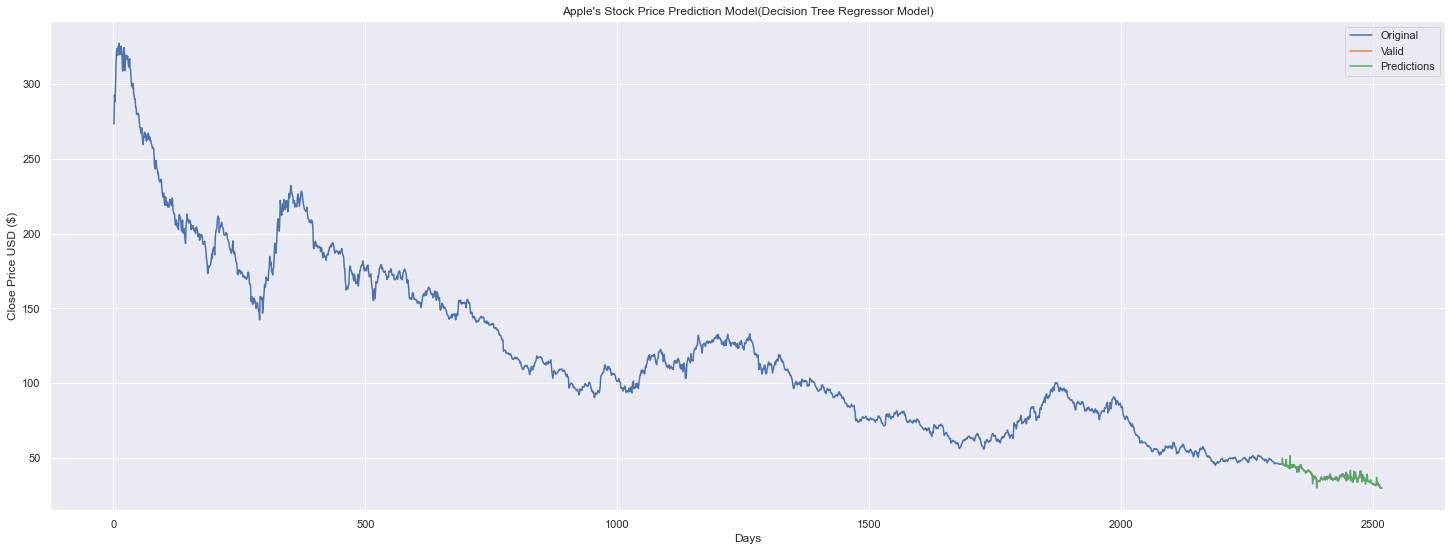

In [171]:
predictions = treePrediction
valid = apple[x.shape[0]:]
valid["Predictions"] = predictions
plt.figure(figsize=(25, 9))
plt.title("Apple's Stock Price Prediction Model(Decision Tree Regressor Model)")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(apple["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Original", "Valid", "Predictions"])
plt.show()

In [172]:
# creating the Linear Regression model
from sklearn.linear_model import LinearRegression
linear = LinearRegression().fit(xtrain, ytrain)

In [173]:
linearPrediction = linear.predict(xfuture)
print("Linear regression Prediction =",linearPrediction)

Linear regression Prediction = [57.67246582 58.06924875 58.18389387 57.93222865 58.9794486  59.1124199
 58.92773755 57.79833394 57.03318076 56.66182718 56.18690941 55.71199164
 55.46238634 56.13818168 56.11687218 55.69174762 55.11433115 55.82258796
 56.20821891 56.73179337 56.72980449 56.08135634 55.08087523 55.33048053
 55.06865778 53.32738735 53.28576279 54.30251016 55.76277929 55.7668281
 56.06409565 55.41266417 55.07881531 54.06306239 55.11028234 52.99964721
 55.0707177  55.45123437 56.99361612 56.62226253 57.41781727 56.78151554
 56.9175412  56.99567604 58.09361261 57.59539645 57.06770216 56.45782421
 56.41825957 55.39845784 55.08897284 54.18786504 53.46234753 53.48770583
 53.05441263 53.07977094 53.65917629 53.40452774 52.85246958 52.61607617
 51.98993198 51.21973554 51.05437381 51.17818202 50.85143632 50.27401985
 50.76925267 49.89449762 50.16747234 49.15477378 49.65604429 50.15326601
 50.31464997 50.89199541 50.29937816 50.22834648 50.79560543 50.87168035
 50.85143632 51.460248

<ipython-input-174-b07f6f50eea1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


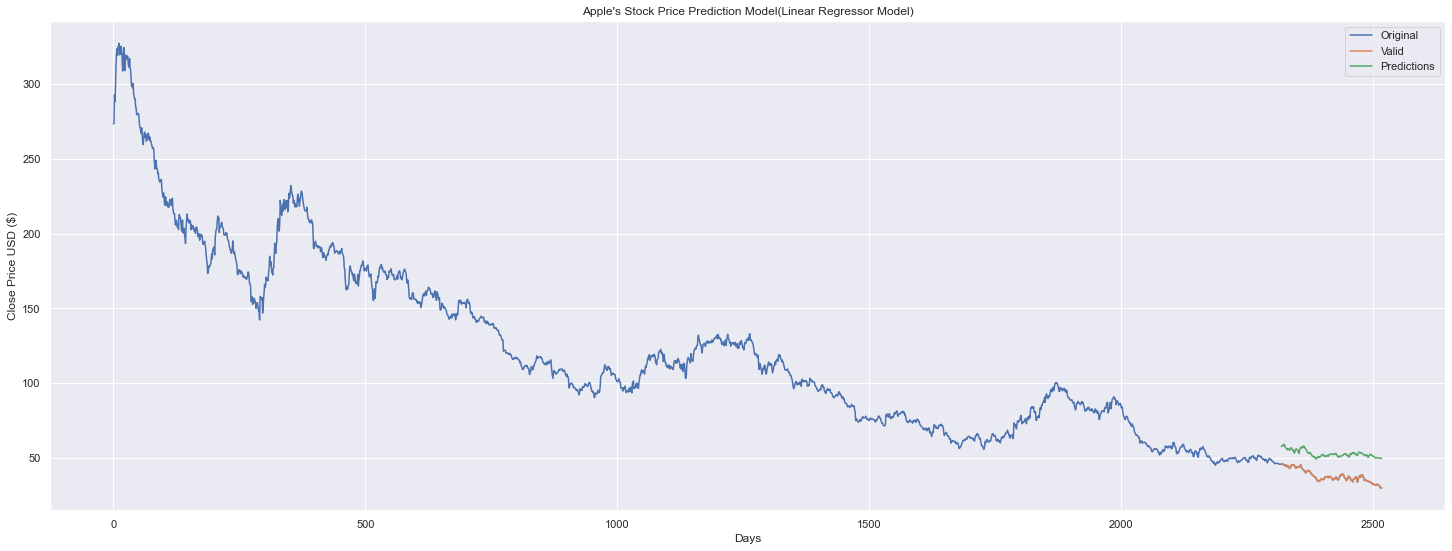

In [174]:
predictions = linearPrediction
valid = apple[x.shape[0]:]
valid["Predictions"] = predictions
plt.figure(figsize=(25, 9))
plt.title("Apple's Stock Price Prediction Model(Linear Regressor Model)")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(apple["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Original", "Valid", "Predictions"])
plt.show()

In [175]:
#creating the Radom Forest Regression model
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=10,random_state=0).fit(xtrain, ytrain)

In [176]:
forestPrediction = forest.predict(xfuture)
print("forest regression Prediction =",forestPrediction)

forest regression Prediction = [54.04714    46.60054    49.0951     60.85202    46.25271    45.66088
 46.49615    45.37771    47.91014    47.35254    47.01062667 46.44057
 43.44426    44.47445    44.044875   46.44057    42.41815    48.62166
 45.53738667 44.84565    45.4617     43.959715   43.20497    48.77042
 44.04325    43.81468    40.67126    43.88015    46.45315    47.74473
 43.959715   43.06983    43.20497    44.12       42.51772    40.35950167
 44.04325    43.45511    44.36045    45.3996     58.6341     51.27524
 46.51302    43.39016    44.49229    43.77926    42.81696    43.718768
 44.37826    45.02883    41.46927    41.6811     41.10296    40.70122
 41.591715   41.397435   40.39638    40.58274    39.5757     38.07959
 38.37986    38.23767    32.6228     37.62912    35.45367    36.64198
 35.49755    35.19728    35.76269    33.83744    30.29514    33.46777667
 35.32086    35.32296    35.33028    34.98688    34.81012    36.45487
 35.45367    36.66731833 36.5921     36.58755    35.

<ipython-input-177-c38c80874a81>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


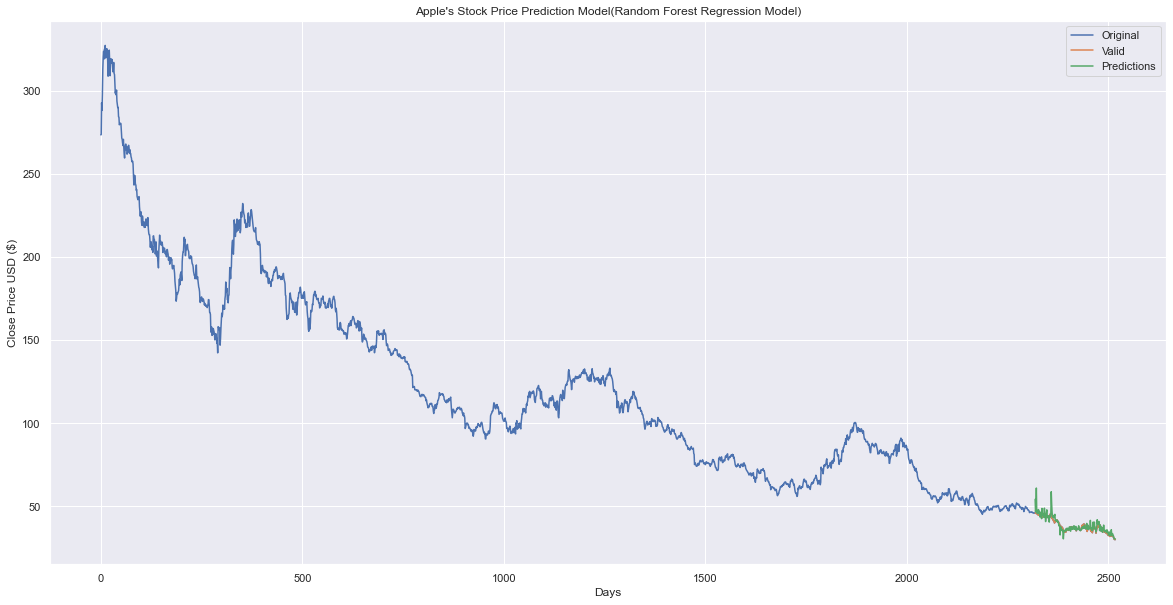

In [177]:
predictions = forestPrediction
valid = apple[x.shape[0]:]
valid["Predictions"] = predictions
plt.figure(figsize=(20, 10))
plt.title("Apple's Stock Price Prediction Model(Random Forest Regression Model)")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(apple["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Original", "Valid", "Predictions"])
plt.show()

In [178]:
#creating the Support Vector Regression model
from sklearn.svm import SVR
svr = SVR(kernel='rbf').fit(xtrain, ytrain)

In [179]:
svrPrediction = svr.predict(xfuture)
print("Support Vector Regression prediction =",svrPrediction)

Support Vector Regression prediction = [48.6028273  48.83422804 48.90312534 48.75307873 49.40599118 49.49420974
 49.37200327 48.67504258 48.25331329 48.06369299 47.83576298 47.6243885
 47.52000141 47.81330972 47.80354534 47.61574938 47.38222285 47.67212258
 47.84563698 48.09865851 48.09765968 47.78734561 47.369459   47.46671648
 47.36481893 46.82000914 46.80984884 47.09645467 47.64619607 47.64794282
 47.77950606 47.49976259 47.36867588 47.02177414 47.38067369 46.7436687
 47.36560048 47.51544605 48.23263857 48.04407754 48.46013227 48.12372228
 48.19320089 48.23371222 48.84879373 48.55915845 48.27144427 47.96376989
 47.94474121 47.49401405 47.3725406  47.06014906 46.85387986 46.8604021
 46.75584123 46.76155699 46.9058151  46.8391954  46.71211961 46.66500292
 46.56147619 46.47673983 46.46470481 46.47351036 46.45291836 46.43740084
 46.4490814  46.44175028 46.43745578 46.48344808 46.45039392 46.43753187
 46.43761953 46.45501094 46.43752182 46.43731296 46.45025293 46.45394639
 46.45291836 46

<ipython-input-180-cafc41b5b592>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


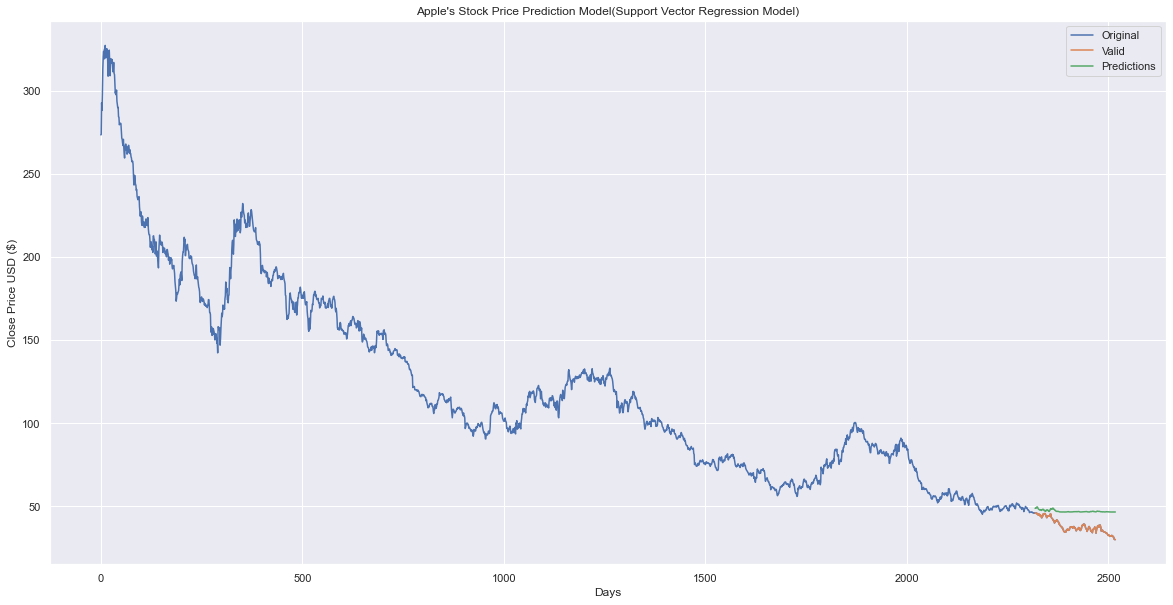

In [180]:
predictions = svrPrediction
valid = apple[x.shape[0]:]
valid["Predictions"] = predictions
plt.figure(figsize=(20, 10))
plt.title("Apple's Stock Price Prediction Model(Support Vector Regression Model)")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(apple["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Original", "Valid", "Predictions"])
plt.show()

In [146]:
def display_scores(scores):
     print("Scores:", scores)
     print("Mean:", scores.mean())
     print("Standard deviation:", scores.std())

In [181]:
tree_scores = cross_val_score(tree, xtrain ,ytrain, scoring="neg_mean_squared_error", cv=10)
tree_rmse_sacores = np.sqrt(-tree_scores)
print('"Mean and Standard Deviation Calculation of Decision Tree Regression"\n')
display_scores(tree_rmse_scores)
tree_pred = tree.predict(xfuture)
print('Decision Tree Regression R2 Score: ',r2_score(ytest, tree_pred))

"Mean and Standard Deviation Calculation of Decision Tree Regression"

Scores: [23.28004629 20.87711669 19.41953099 25.49585202 21.14489745 20.75851378
 23.39900444 22.78699788 23.47414772 26.05993342]
Mean: 22.66960406639164
Standard deviation: 2.0199190413140933


ValueError: Found input variables with inconsistent numbers of samples: [580, 200]

In [149]:
# linear_scores = cross_val_score(linear, xtrain ,ytrain, scoring="neg_mean_squared_error", cv=10)
# linear_rmse_scores = np.sqrt(-linear_scores)
# print('"Mean and Standard Deviation Calculation of Linear Regression"\n')
# display_scores(linear_rmse_scores)
# linear_pred = linear.predict(xtest)
# print('Linear Regression R2 Score: ',r2_score(ytest, linear_pred))

"Mean and Standard Deviation Calculation of Linear Regression"

Scores: [22.13269475 22.4503418  22.44647646 22.87920513 23.27666174 23.78672289
 24.61317662 24.56969973 24.44351777 22.59747003]
Mean: 23.31959669159333
Standard deviation: 0.9144094490773021
Linear Regression R2 Score:  0.7424834985517059


In [151]:
# svr_scores = cross_val_score(svr, xtrain ,ytrain, scoring="neg_mean_squared_error", cv=10)
# svr_rmse_scores = np.sqrt(-svr_scores)
# print('"Mean and Standard Deviation Calculation of Support Vector Regression"\n')
# display_scores(svr_rmse_scores)
# svr_pred = svr.predict(xtest)
# print('Support Vector Regression R2 Score: ',r2_score(ytest, svr_pred))

"Mean and Standard Deviation Calculation of Support Vector Regression"

Scores: [21.92090872 21.74754633 21.29787773 21.60337012 23.30988467 22.90027382
 23.51973392 23.64160843 22.50833332 21.41117067]
Mean: 22.386070773483933
Standard deviation: 0.8582339890061684
Support Vector Regression R2 Score:  0.7828097772231377


In [152]:
# forest_scores = cross_val_score(forest, xtrain ,ytrain, scoring="neg_mean_squared_error", cv=10)
# forest_rmse_scores = np.sqrt(-forest_scores)
# print('"Mean and Standard Deviation Calculation of Random Forest Regression"\n')
# display_scores(forest_rmse_scores)
# forest_pred = forest.predict(xtest)
# print('Random Forest Regression R2 Score: ',r2_score(ytest, forest_pred))

"Mean and Standard Deviation Calculation of Random Forest Regression"

Scores: [18.89163271 21.01880353 18.35958932 19.7014751  21.62158089 20.13315087
 18.8528756  24.26937338 21.66277273 21.97438386]
Mean: 20.648563798491246
Standard deviation: 1.7231904965239213
Random Forest Regression R2 Score:  0.8235466481849648
